# Задача 1. Стохастическая матрица и собственное значение равное 1


[[ 0.07385327  0.1173276   0.18946424  0.31207266  0.2996779   0.00760433]
 [ 0.1607522   0.09300694  0.33280381  0.21380743  0.21576436 -0.01613474]
 [ 0.27004684  0.04213821  0.030868    0.10866085  0.24578325  0.30250286]
 [ 0.06860545  0.24568917  0.15839058  0.28329597  0.00543085  0.23858799]
 [ 0.1856564   0.29612057  0.08147341  0.24064497  0.28082051 -0.08471585]
 [ 0.31150733  0.23986399  0.21860299  0.29125018  0.10777062 -0.1689951 ]]


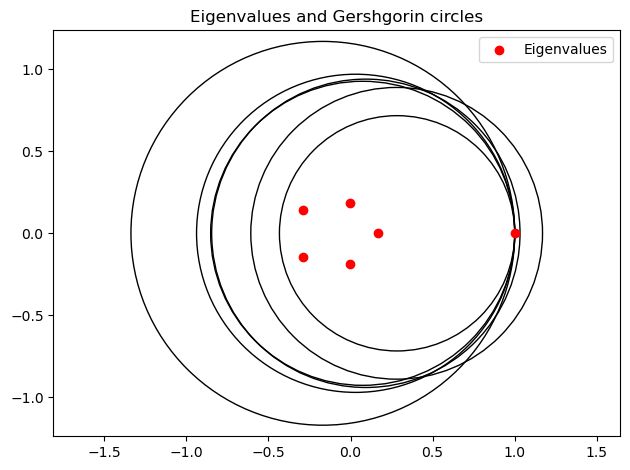

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 6
fig, ax = plt.subplots(1, 1)
a = np.random.random(size=(n,n))/3
for i in range(n):
  a[i,n-1] = 1-np.sum(a[i, :n-1])
print(a)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in range(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
plt.axis('equal')
plt.legend()
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

# Задача 3. Метод обратных итераций и итерации Рэлея

In [9]:
import numpy as np
print("Матрица Лемера")
for i in range(2, 11):
  a = np.eye(i)
  for j in range(i):
    for k in range(i):
      a[j, k] = min(j + 1, k + 1) / max(j + 1, k + 1)
  l_old = 0.0
  l = 0.00001
  eps = 1e-6
  x = np.random.random(i)
  for j in range(i):
    if (j-i)%2 == 0:
      x[j] = x[j]*(-1)
  while np.abs(l-l_old) > eps:
    l_old = l
    x = np.linalg.inv(a - l*np.eye(i)) @ x
    l = ((a @ x).T @ x) / (x.T @ x)
  print("n =", i, ", собственное значение:", l)

from math import factorial
print("\nМатрица Паскаля")
for i in range(2, 11):
  a = np.eye(i)
  for j in range(i):
    for k in range(i):
      a[j, k] = factorial(j+k)/(factorial(j)*factorial(j))
  #print(np.linalg.eigvals(a))
  l_old = 0.0
  l = 0.00001
  eps = 1e-9
  x = np.random.random(i)
  for j in range(i):
    if (j-i)%2 == 0:
      x[j] = x[j]*(-1)
  while np.abs(l-l_old) > eps:
    l_old = l
    x = np.linalg.inv(a - l*np.eye(i)) @ x
    l = ((a @ x).T @ x) / (x.T @ x)
  print("n =", i, ", собственное значение:", l)

from scipy.linalg import hilbert
print("\nМатрица Гильберта")
for i in range(2, 11):
  a = hilbert(i)
  #print(np.linalg.eigvals(a))
  l_old = 0.0
  l = 0.00001
  eps = 10**(-i-4)
  x = np.random.random(i)
  while np.abs(l-l_old) > eps:
    l_old = l
    x = np.linalg.inv(a - l*np.eye(i)) @ x
    l = ((a @ x).T @ x) / (x.T @ x)
  print("n =", i, ", собственное значение:", l)

print("Симметричная трехдиагональная матрица")
for i in range(2, 11):
  a = np.eye(i)*2
  for j in range(i):
    for k in range(i):
      if j == k-1:
        a[j, k] = -1
      if j == k+1:
        a[j, k] = -1
  #print(np.linalg.eig(a))
  l_old = 0.0
  l = 0.00001
  eps = 1e-6
  x = np.random.random(i)
  while np.abs(l-l_old) > eps:
    l_old = l
    x = np.linalg.inv(a - l*np.eye(i)) @ x
    l = ((a @ x).T @ x) / (x.T @ x)
  print("n =", i, ", собственное значение:", l)

Матрица Лемера
n = 2 , собственное значение: 0.5
n = 3 , собственное значение: 0.30201956728920804
n = 4 , собственное значение: 0.20777548591801154
n = 5 , собственное значение: 0.1560195364491725
n = 6 , собственное значение: 0.12400683125567902
n = 7 , собственное значение: 0.10246748881795241
n = 8 , собственное значение: 0.08707296371264503
n = 9 , собственное значение: 0.0755642472787909
n = 10 , собственное значение: 0.0905249585975289

Матрица Паскаля
n = 2 , собственное значение: 0.38196601125010515
n = 3 , собственное значение: 0.1270166537925832
n = 4 , собственное значение: 0.03801601522914009
n = 5 , собственное значение: 0.010835359068795401
n = 6 , собственное значение: 0.0030043895747406974
n = 7 , собственное значение: 0.0008182872282890244
n = 8 , собственное значение: 0.00022008514614626262
n = 9 , собственное значение: 5.8642934619991987e-05
n = 10 , собственное значение: 1.5513283777660345e-05

Матрица Гильберта
n = 2 , собственное значение: 0.06574145408933511
n =

# Задача 4.  PageRank с помощью библиотек на Python

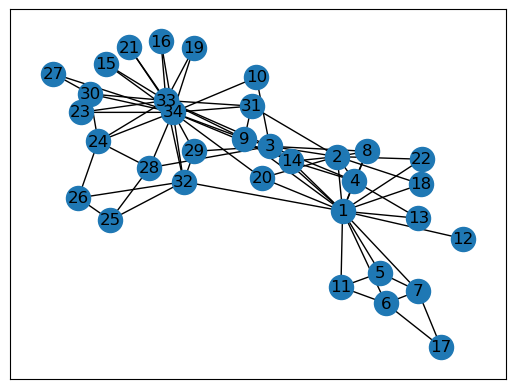

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('graph.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph

Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

  

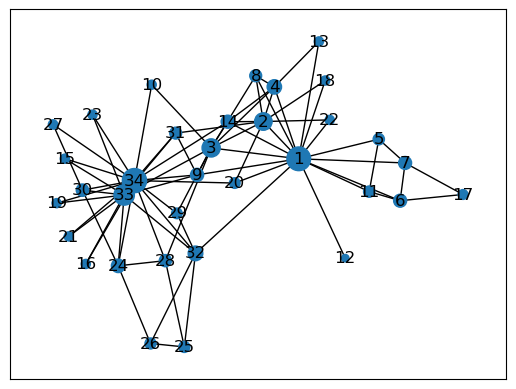

In [4]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

Самостоятельно проделайте это всё для страниц stanford.edu

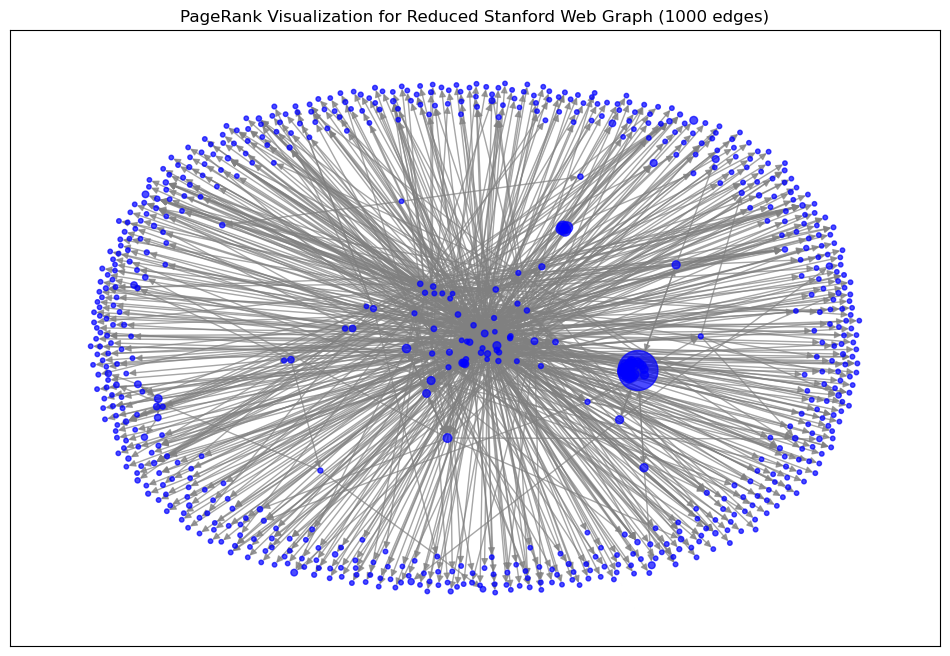

In [17]:
# Reload necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Load a subset of edges from the file to create a smaller graph
file_path = 'web-Stanford'

# Read only the first 1000 edges from the file
edges = []
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("#"):  # Skip comment lines
            continue
        edges.append(tuple(map(int, line.strip().split('\t'))))
        if len(edges) >= 1000:  # Limit to 1000 edges
            break

# Create a directed graph using the sampled edges
small_graph = nx.DiGraph()
small_graph.add_edges_from(edges)

# Compute PageRank for the smaller graph
small_pagerank = nx.pagerank(small_graph)

# Convert PageRank values to a scaled array for node sizes
pagerank_values = np.array(list(small_pagerank.values()))
node_sizes = pagerank_values * 10000  # Scaled for visualization

# Visualize the smaller graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(small_graph, seed=42)  # Generate positions for nodes
nx.draw_networkx(
    small_graph,
    pos,
    node_size=node_sizes,
    with_labels=False,  # No labels for clarity
    node_color='blue',
    alpha=0.7,
    edge_color='gray',
    font_size=8
)
plt.title("PageRank Visualization for Reduced Stanford Web Graph (1000 edges)")
plt.show()
